<a href="https://colab.research.google.com/github/AV13012003/Codsoft/blob/main/IMDb_Movies_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving IMDb Movies India.csv to IMDb Movies India.csv


In [ ]:
df = pd.read_csv("IMDb Movies India.csv", encoding="latin1")

In [ ]:
df.head(3)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana


In [ ]:
df.tail(3)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [ ]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
df.describe()

,Year,Duration,Genre,Rating,Votes,Director
count,7919.000000,7919.000000,7919.000000,7919.000000,7919.000000,7919.000000
mean,1993.321758,132.739866,200.606642,5.841621,1938.520394,1566.992802
std,20.463770,22.838302,131.023193,1.381777,11602.415952,883.353846
min,1917.000000,21.000000,0.000000,1.100000,5.000000,0.000000
25%,1979.500000,124.000000,49.000000,4.900000,16.000000,828.000000
50%,1997.000000,134.000000,223.000000,6.000000,55.000000,1545.000000
75%,2011.000000,143.000000,298.500000,6.800000,404.000000,2317.000000
max,2021.000000,321.000000,432.000000,10.000000,591417.000000,3139.000000


In [ ]:
df.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [ ]:
df = df.dropna(subset=["Rating"])

In [ ]:
df["Year"] = df["Year"].str.extract("(\d+)").astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-3558393871.py:1: SyntaxWarning: invalid escape sequence '\d'
  df["Year"] = df["Year"].str.extract("(\d+)").astype(float)


In [ ]:
df["Duration"] = df["Duration"].str.extract("(\d+)").astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-629171584.py:1: SyntaxWarning: invalid escape sequence '\d'
  df["Duration"] = df["Duration"].str.extract("(\d+)").astype(float)


In [ ]:
df["Duration"] = df["Duration"].fillna(df["Duration"].median())
df["Votes"] = df["Votes"].str.replace(",", "").astype(float)
df["Votes"] = df["Votes"].fillna(df["Votes"].median())

In [ ]:
df.drop(columns=["Name", "Actor 1", "Actor 2", "Actor 3"], inplace=True)

In [ ]:
df.isnull().sum()

,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0


In [ ]:
le = LabelEncoder()
df["Genre"] = le.fit_transform(df["Genre"])
df["Director"] = le.fit_transform(df["Director"])

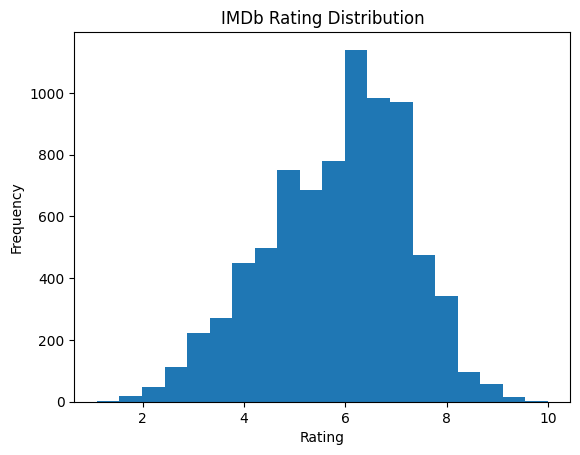

In [ ]:
df["Rating"].plot(kind="hist", bins=20)
plt.title("IMDb Rating Distribution")
plt.xlabel("Rating")
plt.show()

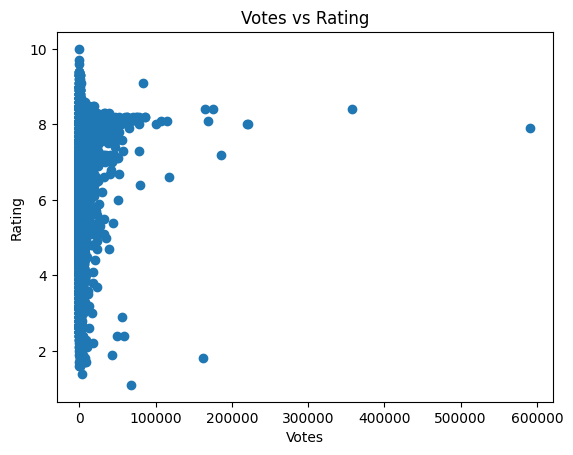

In [ ]:
plt.scatter(df["Votes"], df["Rating"])
plt.xlabel("Votes")
plt.ylabel("Rating")
plt.title("Votes vs Rating")
plt.show()


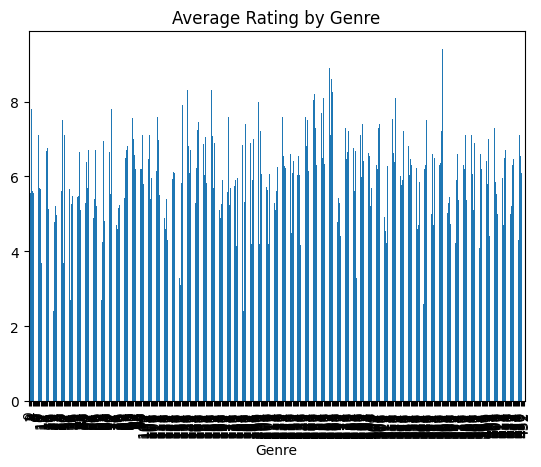

In [ ]:
df.groupby("Genre")["Rating"].mean().plot(kind="bar")
plt.title("Average Rating by Genre")
plt.show()

In [ ]:
corr = df.corr()["Rating"].sort_values(ascending=False)
print(corr)

Rating      1.000000
Genre       0.127672
Votes       0.126635
Director   -0.008520
Duration   -0.030474
Year       -0.166673
Name: Rating, dtype: float64


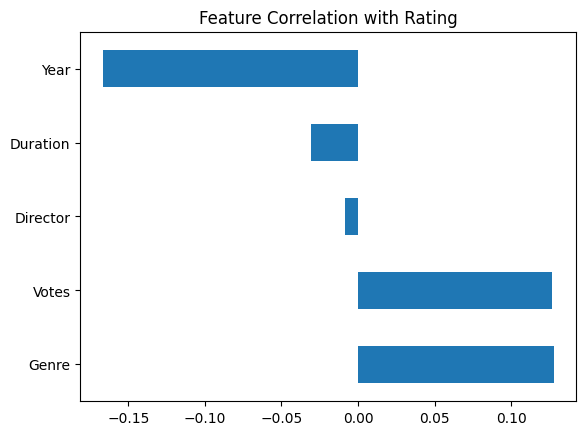

In [ ]:
corr.drop("Rating").plot(kind="barh")
plt.title("Feature Correlation with Rating")
plt.show()

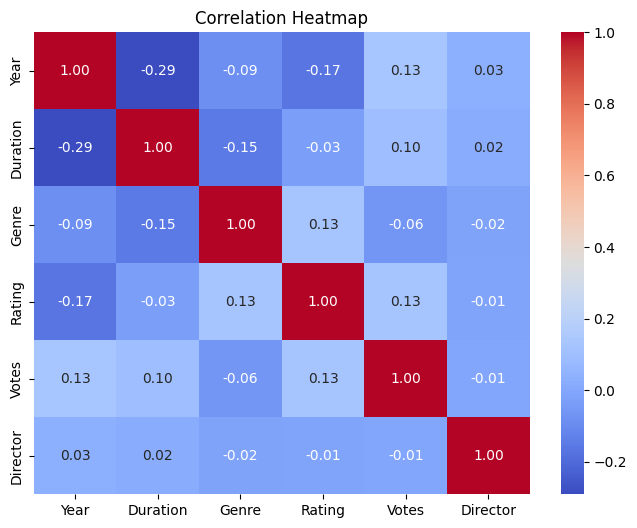

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
X = df.drop("Rating", axis=1)
y = df["Rating"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 1.037243826283634
RMSE: 1.3010606823863236
R2 Score: 0.08949610105936434


In [ ]:
df.to_csv("IMDb_Movies_India_Cleaned.csv", index=False)